# Data pre-processing

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
from fastai.tabular.all import *
from fastai.metrics import * 
from sklearn.metrics import roc_auc_score 


#path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
path = Path('/home/jupyter/fraud-detection-pytorch-scikit-fastai/data')

Path.BASE_PATH = path
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [3]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [4]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
57195,3044195,0,1316341,418.95,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,aol.com,NaN,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,472.0,NaN,463.0,288.0,288.0,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312877,3299877,0,7780176,59.00,W,12577,268.0,150.0,visa,166.0,debit,325.0,87.0,4.0,NaN,gmail.com,NaN,5.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,4.0,0.0,NaN,NaN,330.0,196.0,NaN,NaN,NaN,NaN,400.0,301.0,NaN,NaN,NaN,330.0,T,T,T,M0,F,T,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195195,3182195,1,4394717,29.00,W,4693,417.0,150.0,visa,195.0,debit,308.0,87.0,1.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0,1.0,51.0,51.0,0.0,51.0,0.0,NaN,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,51.0,T,T,T,M0,T,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21600,3008600,0,572518,24.00,W,7919,194.0,150.0,mastercard,202.0,debit,123.0,87.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M1,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12253,2999253,0,348181,57.95,W,13108,215.0,150.0,visa,226.0,debit,191.0,87.0,27.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,18.0,2.0,484.0,484.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,483.0,NaN,NaN,NaN,NaN,NaN,T,T,T,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [12]:
# I had to do this so that the learner would automatically use FlattenedLoss of 
# CrossEntropyLoss() as the loss function. Leaving the dep_var as an int causes 
# FlattenedLoss of MSELoss() to be chosen.
train_ss['isFraud'] = train_ss['isFraud'].astype('category')

In [13]:
train_ss['isFraud']

57195     0
312877    0
195195    1
21600     0
12253     0
         ..
224165    0
322952    1
449491    0
343893    0
125898    0
Name: isFraud, Length: 59054, dtype: category
Categories (2, int64): [0, 1]

In [14]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [15]:
train_ss[cat].nunique()

ProductCD           5
card1            6083
card2             499
card3              64
card4               4
card5              81
card6               4
addr1             144
addr2              27
P_emaildomain      59
R_emaildomain      59
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        766
id_12               2
id_13              37
id_14              20
id_15               3
id_16               2
id_17              60
id_18              13
id_19             358
id_20             206
id_21             131
id_22              12
id_23               3
id_24               8
id_25             126
id_26              46
id_27               1
id_28               2
id_29               2
id_30              72
id_31             107
id_32               4
id_33             112
id_34               3
id_35     

There are a number of categorical variables where the number of categories has high cardinality, so deep learning might help us in this senerio.

In [16]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12579784

In [17]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [18]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_ss, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [19]:
(path/'to_nn.pkl').save(to_nn)

In [4]:
to_nn = (path/'to_nn.pkl').load()

In [5]:
to_nn.items

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
57195,-1.322806,0,-1.245707,1.240415,5,1233,390,30,4,70,3,68,21,-0.183705,-0.092442,3,0,-0.089028,-0.090942,-0.034647,-0.061955,-0.134384,-0.109859,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.224706,-0.123058,2.468850,-0.280162,9.471498,1.122761,4.260183,-0.145077,-0.097696,-0.154975,0.113073,1.089056,-0.372027,-0.133032,-0.07686,-0.121596,0.805232,0,0,0,0,0,2,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,1,1,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
312877,0.506394,0,0.519150,-0.328971,5,3740,168,30,4,40,3,70,21,-0.200412,-0.092442,17,0,-0.068799,-0.079297,-0.034647,-0.061955,-0.174292,-0.097012,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.150241,-0.085467,-0.590402,-0.280162,-0.233869,1.378097,2.774099,-0.145077,-0.097696,-0.154975,0.113073,1.751793,1.585534,-0.133032,-0.07686,-0.121596,1.033601,2,2,2,1,1,2,1,2,2,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
195195,-0.335527,1,-0.405201,-0.459771,5,1196,317,30,4,51,3,64,21,-0.212942,-0.092442,54,0,-0.095771,-0.085119,-0.034647,-0.061955,-0.214200,-0.109859,-0.050231,-0.056906,-0.141792,-0.057582,-0.086453,-0.051114,-0.180027,-0.141853,-0.259847,-0.634464,-0.404513,-0.318066,-0.391905,-0.145077,-0.097696,-0.154975,0.113073,-0.313342,-0.261222,-0.133032,-0.07686,-0.121596,-0.483425,2,2,2,1,2,1,1,2,2,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
21600,-1.577460,0,-1.448797,-0.481571,5,2236,94,30,3,57,3,6,21,-0.217119,-0.092442,0,0,-0.095771,-0.090942,-0.034647,-0.061955,-0.214200,-0.122707,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.232152,-0.141853,-0.590402,-0.280162,-0.233869,-0.482211,-0.246527,-0.145077,-0.097696,-0.154975,0.113073,-0.615123,-0.637960,-0.133032,-0.07686,-0.121596,-0.760731,2,2,2,2,2,1,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
12253,-1.644330,0,-1.510049,-0.333549,5,3916,115,30,4,70,3,26,21,-0.104347,-0.092442,0,0,-0.089028,-0.085119,-0.034647,-0.061955,-0.094476,-0.109859,-0.050231,-0.056906,-0.141792,-0.057582,-0.076868,-0.051114,-0.105562,-0.123058,2.546627,2.700589,-0.255200,-0.482211,-0.246527,-0.145077,-0.097696,-0.154975,0.113073,2.242928,-0.372027,-0.133032,-0.07686,-0.121596,-0.499737,2,2,2,0,0,1,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [29]:
dls = to_nn.dataloaders(1024)

In [30]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

Let's also use the ActivationStats callback to diagnose the condition of our neural network.

In [31]:
from fastai.callback.hook import *

In [37]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0012022644514217973)

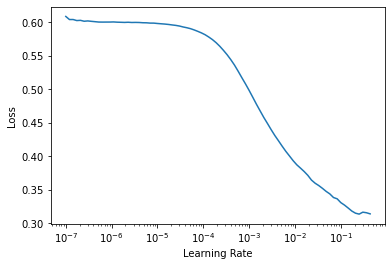

In [38]:
learn.lr_find()

In [40]:
learn.fit_one_cycle?

In [39]:
learn.fit_one_cycle(4, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.179978,0.149063,0.965999,0.000000,0.000000,0.000000,0.756229,00:04
1,0.125601,0.126061,0.965905,0.496855,0.217631,0.302682,0.808352,00:04
2,0.098767,0.135782,0.964781,0.465969,0.245179,0.321300,0.782083,00:04
3,0.080159,0.139473,0.962533,0.413953,0.245179,0.307958,0.790267,00:04


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


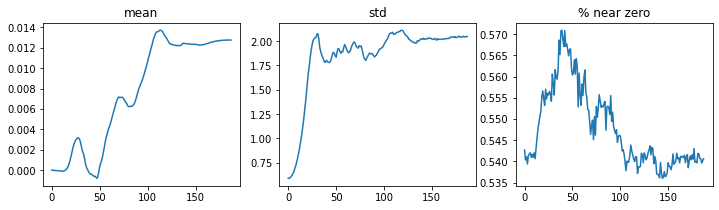

In [35]:
learn.activation_stats.plot_layer_stats(-2)

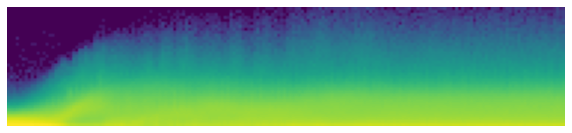

In [36]:
learn.activation_stats.color_dim(-2)

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=3.981071586167673e-06)

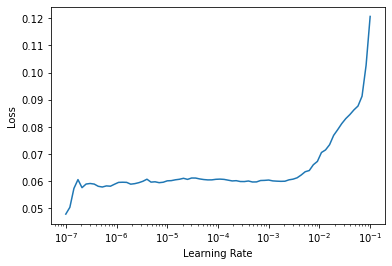

In [14]:
learn.lr_find()

In [32]:
learn.save('nn_stage-1')

Path('models/nn_nf_stage-1.pth')

In [39]:
learn.load('nn_nf_stage-1')

## Full Data

In [4]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
train_s['isFraud'] = train_s['isFraud'].astype('category')

In [5]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2','V3','V4','V5','V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V250',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V269',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337','V338','V339']


In [6]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [28]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2','V3','V4','V5','V6','V7','V8', 'V9','V10', 'V11', 'V12',
        'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
        'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33',
        'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 
        'V46', 'V47','V48',
        'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 
        'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75',
        'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91',
        'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106',
        'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
        'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134',
        'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 
        'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161',
        'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
        'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188',
        'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200','V201', 'V202',
        'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 
        'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225','V226', 'V227', 'V228', 'V229', 'V230','V231',
        'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
        'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258',
        'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272',
        'V273','V274', 'V275', 'V276', 'V277', 'V278', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301']


In [7]:
train_s[cat].nunique()

ProductCD           5
card1            6183
card2             498
card3              73
card4               4
card5              75
card6               4
addr1             140
addr2              32
P_emaildomain      59
R_emaildomain      60
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        803
id_12               2
id_13              37
id_14              21
id_15               3
id_16               2
id_17              60
id_18              13
id_19             362
id_20             217
id_21             129
id_22               8
id_23               3
id_24               9
id_25             119
id_26              50
id_27               2
id_28               2
id_29               2
id_30              72
id_31             106
id_32               3
id_33             105
id_34               3
id_35     

In [10]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)
cut_off

12579548

In [12]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [13]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_s, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [26]:
(path/'to_nn_full.pkl').save(to_nn)

In [14]:
dls = to_nn.dataloaders(1024)

In [23]:
learn = tabular_learner(dls, layers=[500,250], metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [17]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(6, 4)
    (1): Embedding(5663, 202)
    (2): Embedding(499, 52)
    (3): Embedding(68, 17)
    (4): Embedding(5, 4)
    (5): Embedding(72, 18)
    (6): Embedding(5, 4)
    (7): Embedding(139, 25)
    (8): Embedding(30, 11)
    (9): Embedding(60, 16)
    (10): Embedding(61, 16)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(4, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(804, 68)
    (22): Embedding(3, 3)
    (23): Embedding(37, 12)
    (24): Embedding(22, 9)
    (25): Embedding(4, 3)
    (26): Embedding(3, 3)
    (27): Embedding(56, 15)
    (28): Embedding(14, 7)
    (29): Embedding(345, 42)
    (30): Embedding(207, 32)
    (31): Embedding(114, 23)
    (32): Embedding(8, 5)
    (33): Embedding(4, 3)
    (34): Embedding(7, 5)
    (35): Embedding(108

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.0002754228771664202)

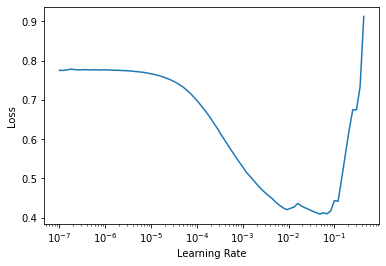

In [24]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(4, 2e-3, wd=0.01)

epoch,train_loss,valid_loss,accuracy,f1_score,roc_auc_score,time
0,0.178699,0.172268,0.966784,0.189616,0.607109,00:08
1,0.120166,0.123397,0.970115,0.350101,0.816823,00:08
2,0.092562,0.116278,0.970855,0.440497,0.845573,00:08
3,0.074358,0.121429,0.968634,0.443350,0.837521,00:08


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.75422871709452e-06)

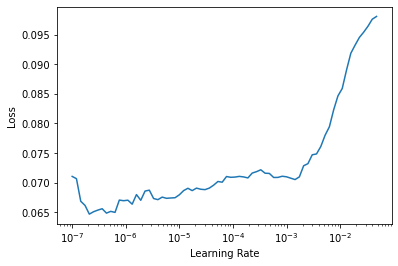

In [80]:
learn.lr_find()

In [81]:
learn.save('nn_nf_full_stage-1')

Path('models/nn_nf_full_stage-1.pth')

In [84]:
learn.load('nn_nf_full_stage-1')

In [85]:
learn.fit_one_cycle(4, 1e-4, wd=0.01)

epoch,train_loss,valid_loss,accuracy,f1_score,roc_auc_score,time
0,0.071177,0.119420,0.968153,0.415808,0.846506,00:09
1,0.069875,0.118758,0.968153,0.435216,0.849814,00:08
2,0.066335,0.117666,0.968809,0.465490,0.853236,00:09
3,0.061799,0.118956,0.968528,0.456311,0.852831,00:08


## Imbalanced learn

### RandomUnderSampler

In [86]:
from imblearn.under_sampling import RandomUnderSampler

In [87]:
rus = RandomUnderSampler(random_state=42)

In [92]:
df_nn, s_isFraud = rus.fit_resample(train_s.drop(['isFraud'], axis=1), train_s['isFraud'])

In [93]:
df_nn['isFraud'] = s_isFraud

In [94]:
df_nn

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,...,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3420601,10962141,49.000,W,10152,555.0,150.0,visa,226.0,debit,191.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,F,M0,F,T,F,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3358446,9238482,1865.970,W,13844,583.0,150.0,visa,226.0,credit,330.0,87.0,NaN,NaN,gmail.com,NaN,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,NaN,NaN,T,T,T,T,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1905.949951,1905.949951,1905.949951,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1905.949951,1905.949951,1905.949951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3098484,2170469,100.00

In [95]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [114]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)
cut_off

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [115]:
to_nn.xs.shape

(4338, 694)

In [125]:
dls = to_nn.dataloaders(512)

In [126]:
learn = tabular_learner(dls, layers=[500,250], metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.001737800776027143)

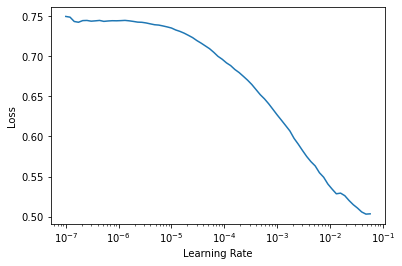

In [127]:
learn.lr_find()

In [128]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,roc_auc_score,time
0,0.630081,0.832865,0.736306,0.757327,0.808435,00:00
1,0.545632,0.912904,0.747771,0.754950,0.815512,00:00
2,0.476050,0.894719,0.751592,0.729542,0.824507,00:00
3,0.424775,0.905330,0.750318,0.727019,0.826672,00:00


### RandomOverSampler

In [129]:
from imblearn.over_sampling import RandomOverSampler

In [130]:
ros = RandomOverSampler(random_state=42)

In [131]:
df_nn, s_isFraud = ros.fit_resample(train_s.drop(['isFraud'], axis=1), train_s['isFraud'])

In [132]:
df_nn['isFraud'] = s_isFraud

In [133]:
df_nn

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,...,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3054118,1529352,50.000,S,6394,225.0,150.0,mastercard,224.0,debit,203.0,87.0,NaN,0.0,NaN,gmail.com,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,374.0,374.0,NaN,NaN,NaN,NaN,NaN,623.666687,0.666666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,83923.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,NaN,216.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows,0
1,3286740,7411014,150.000,R,10356,399.0,150.0,american express,185.0,credit,269.0,87.0,NaN,NaN,twc.com,comcast.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,252.750000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [134]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [135]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)
cut_off

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [138]:
dls = to_nn.dataloaders(1024)

In [139]:
learn = tabular_learner(dls, layers=[500,250], metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0012022644514217973)

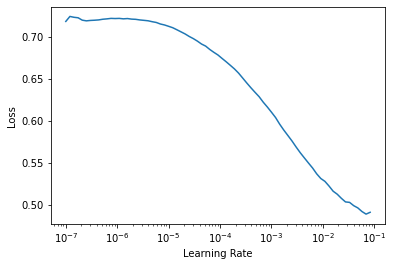

In [140]:
learn.lr_find()

In [141]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,roc_auc_score,time
0,0.265071,0.737943,0.760705,0.715464,0.848345,00:17
1,0.093097,1.877284,0.688310,0.566838,0.816009,00:17
2,0.028246,2.579660,0.675016,0.526958,0.830489,00:17
3,0.008522,2.636171,0.679062,0.534934,0.838543,00:17


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=9.12010818865383e-07)

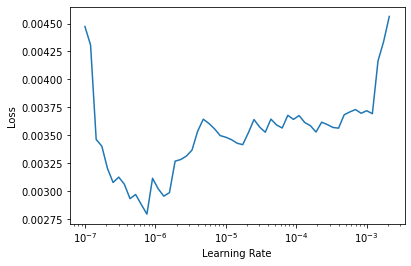

In [142]:
learn.lr_find()

In [143]:
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,accuracy,f1_score,roc_auc_score,time
0,0.003773,2.754226,0.684408,0.545253,0.848259,00:17
1,0.003081,2.855178,0.685998,0.548764,0.843252,00:17
2,0.002062,2.896148,0.680651,0.538494,0.837593,00:17
3,0.001621,2.895933,0.680410,0.538113,0.838700,00:17


### Class weighting

In [51]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [52]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [53]:
to_nn = (path/'to_nn_full.pkl').load()

In [54]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[500, 250], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=0.17378008365631104)

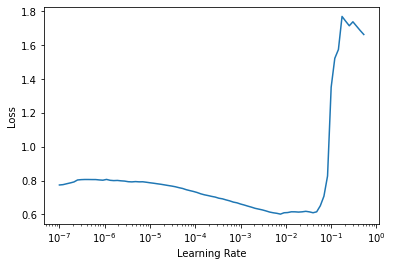

In [55]:
learn.lr_find()

In [56]:
learn.fit_one_cycle(4, max_lr=1e-3 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,f1_score,roc_auc_score,time
0,0.516271,0.695532,0.880922,0.279799,0.843848,00:08
1,0.413889,0.515528,0.835492,0.238218,0.842487,00:08
2,0.320574,0.719528,0.866488,0.244898,0.812729,00:08
3,0.249945,0.681361,0.865840,0.261711,0.831895,00:08


In [43]:
learn.export(fname='nn_full_weighted.pkl')